In [1]:
!pip install spacy
!pip install textblob
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python3 -m spacy download en_core_web_sm

2023-04-29 18:35:37.238196: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-29 18:35:38.282041: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-29 18:35:39.583290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-29 18:35:39.583724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

লন্ডন -> nsubj
হল -> ROOT
দ্যা -> det
মূলধন  -> attr
এবং -> cc
সর্ববৃহৎ -> amod
শহর -> conj
মধ্যে -> prep
ইংল্যান্ড -> pobj
এবং -> cc
দ্যা -> det
ইউনাইটেড -> compound
সে ক্ষেত্রে আইন বিধি করে -> conj
. -> punct
দাঁড়ানো -> advcl
অন -> prep
দ্যা -> det
নদী -> compound
টেমস -> pobj
মধ্যে -> prep
দ্যা -> det
দক্ষিণ -> compound
- -> punct
পূর্ব -> pobj
মধ্যে -> prep
ইংল্যান্ড -> pobj
, -> punct
এ -> meta
দ্যা -> det
মাথা -> pobj
মধ্যে -> prep
এগুলি হয় -> poss
50 -> nummod
- -> punct
মাইল -> nmod
( -> punct
80 -> nummod
কিমি -> pobj
) -> punct
eSTURURE -> advmod
নেতৃস্থানীয় -> acl
প্রতি -> prep
দ্যা -> det
উত্তর -> compound
সাগর -> pobj
, -> punct
লন্ডন -> nsubj
আছে -> aux
হয়েছে -> ROOT
a -> det
মেজর -> amod
নিষ্পত্তি -> attr
জন্য -> prep
দুই -> nummod
সহস্রাব্দ -> pobj
. -> punct
Londinium -> nsubjpass
was. -> auxpass
প্রতিষ্ঠিত -> ROOT
এর পর্যালোচনা -> agent
দ্যা -> det
রোমানস -> pobj
. -> punct
আইএমসি -> det
শহর -> nsubj
মধ্যে -> prep
লন্ডন -> pobj
, -> punct
লন্ডন -> poss
S -> case
প্র

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2482 (\N{BENGALI LETTER LA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Bengali natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2472 (\N{BENGALI LETTER NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2509 (\N{BENGALI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2465 (\N{BENGALI LETTER DDA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylab

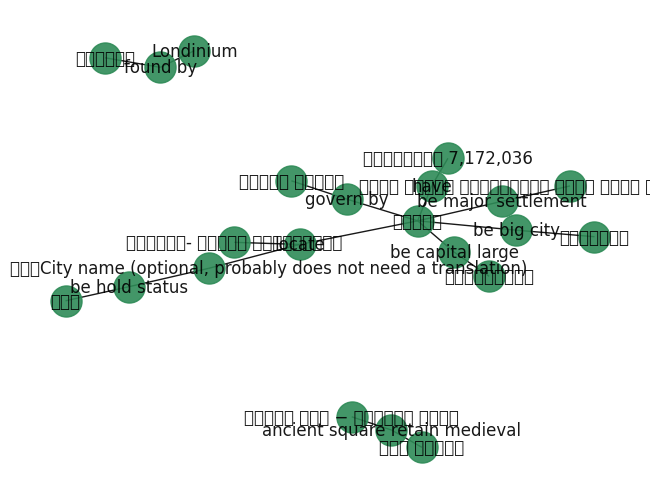

In [13]:
import spacy
from spacy.lang.en import English
import networkx as nx
import matplotlib.pyplot as plt
from textblob import TextBlob
from translate import Translator


def getSentences(text):
    nlp = English()
    nlp.add_pipe('sentencizer')
    document = nlp(text)
    return [sent.text.strip() for sent in document.sents]

def printToken(token):
    print(Translator(to_lang="bn").translate(token.text), "->", token.dep_)

def appendChunk(original, chunk):
    return original + ' ' + chunk

def isRelationCandidate(token):
    deps = ["ROOT", "adj", "attr", "agent", "amod"]
    return any(subs in token.dep_ for subs in deps)

def isConstructionCandidate(token):
    deps = ["compound", "prep", "conj", "mod"]
    return any(subs in token.dep_ for subs in deps)

def processSubjectObjectPairs(tokens):
    subject = ''
    object = ''
    relation = ''
    subjectConstruction = ''
    objectConstruction = ''
    for token in tokens:
        printToken(token)
        if "punct" in token.dep_:
            continue
        if isRelationCandidate(token):
            relation = appendChunk(relation, token.lemma_)
        if isConstructionCandidate(token):
            if subjectConstruction:
                subjectConstruction = appendChunk(subjectConstruction, Translator(to_lang="bn").translate(token.text))
            if objectConstruction:
                objectConstruction = appendChunk(objectConstruction, Translator(to_lang="bn").translate(token.text))
        if "subj" in token.dep_:
            subject = appendChunk(subject, Translator(to_lang="bn").translate(token.text))
            subject = appendChunk(subjectConstruction, subject)
            subjectConstruction = ''
        if "obj" in token.dep_:
            object = appendChunk(object, Translator(to_lang="bn").translate(token.text))
            object = appendChunk(objectConstruction, object)
            objectConstruction = ''
    return (subject.strip(), relation.strip(), object.strip())

def processSentence(sentence):
    tokens = nlp_model(sentence)
    return processSubjectObjectPairs(tokens)

def printGraph(triples):
    G = nx.Graph()
    for triple in triples:
        G.add_node(triple[0])
        G.add_node(triple[1])
        G.add_node(triple[2])
        G.add_edge(triple[0], triple[1])
        G.add_edge(triple[1], triple[2])

    pos = nx.spring_layout(G)
    plt.figure()
    nx.draw(G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color='seagreen', alpha=0.9,
            labels={node: node for node in G.nodes()})
    plt.axis('off')
    plt.show()


if __name__ == "__main__":
    text = "London is the capital and largest city of England and the United Kingdom. Standing on the River " \
           "Thames in the south-east of England, at the head of its 50-mile (80 km) estuary leading to " \
           "the North Sea, London has been a major settlement for two millennia. " \
           "Londinium was founded by the Romans. The City of London, " \
           "London's ancient core − an area of just 1.12 square miles (2.9 km2) and colloquially known as " \
           "the Square Mile − retains boundaries that follow closely its medieval limits." \
           "The City of Westminster is also an Inner London borough holding city status. " \
           "Greater London is governed by the Mayor of London and the London Assembly." \
           "London is located in the southeast of England." \
           "Westminster is located in London." \
           "London is the biggest city in Britain. London has a population of 7,172,036."

    sentences = getSentences(text)
    nlp_model = spacy.load('en_core_web_sm')

    triples = []
    for sentence in sentences:
        triples.append(processSentence(sentence))

    printGraph(triples)